# Company_Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
company = pd.read_csv('Company_Data.csv')
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
company.shape

(400, 11)

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


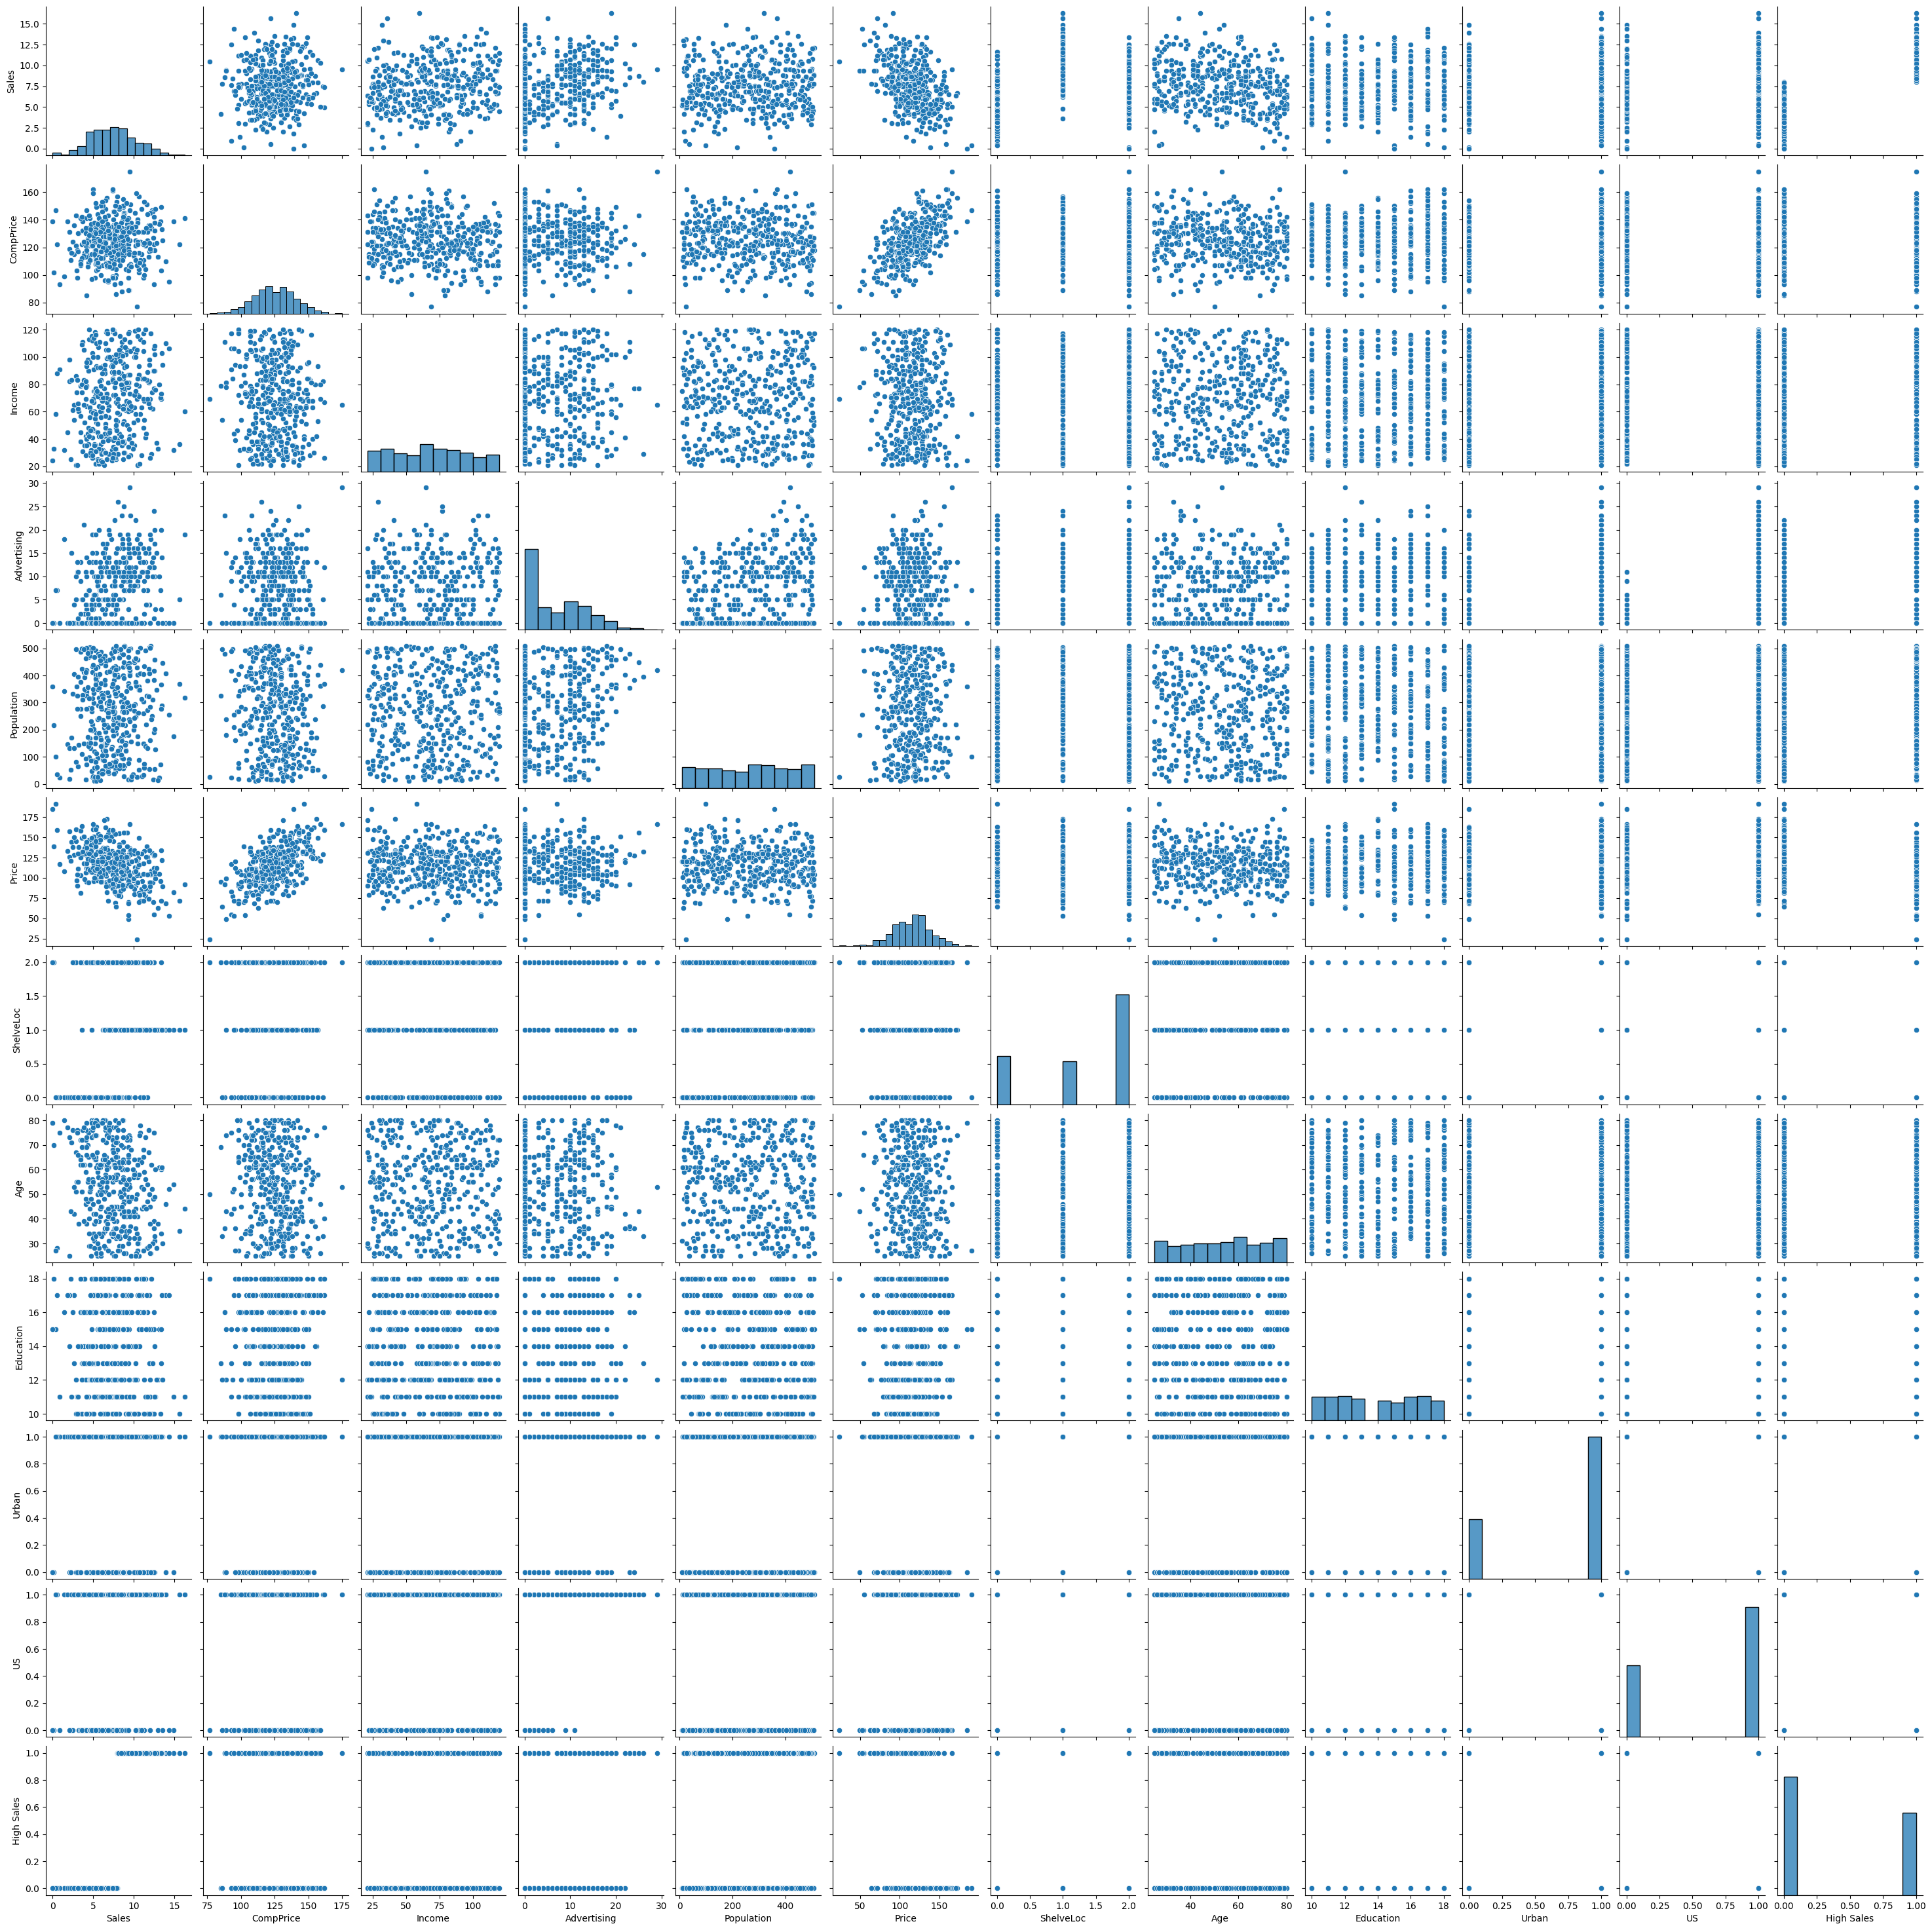

In [34]:
# visualization
sns.pairplot(company)

<Axes: xlabel='Education', ylabel='Income'>

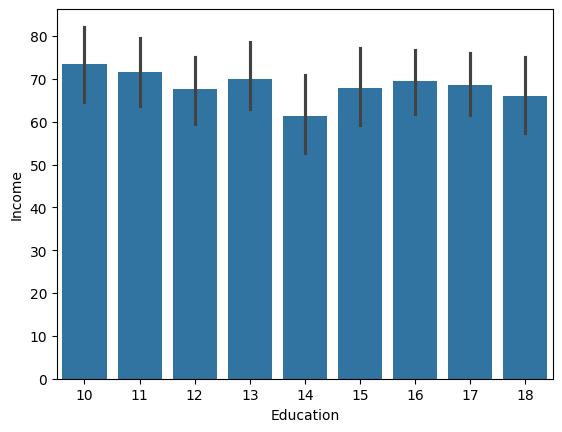

In [39]:
sns.barplot(x = 'Education', y = 'Income', data = company)

In [40]:
sns.boxplot(x = 'Advertising', y = 'Income', data = company)

<Axes: xlabel='Advertising', ylabel='Income'>

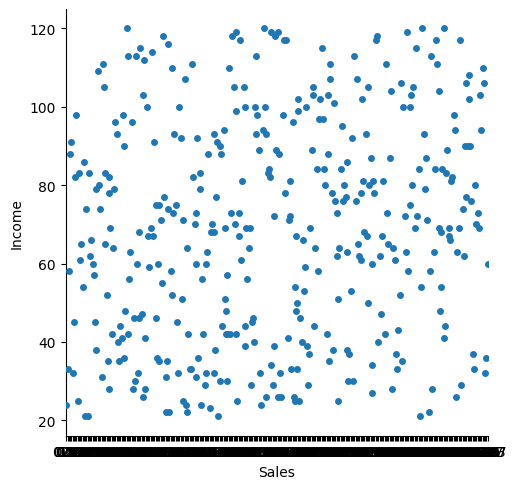

In [38]:
sns.catplot(x = 'Sales', y = 'Income', data = company)

In [41]:
sns.jointplot(x = 'Price', y = 'Income', data = company)

In [43]:
sns.stripplot(x = 'Education', y = 'Income', data = company)

<Axes: xlabel='Education', ylabel='Income'>

<Axes: xlabel='Income', ylabel='Density'>

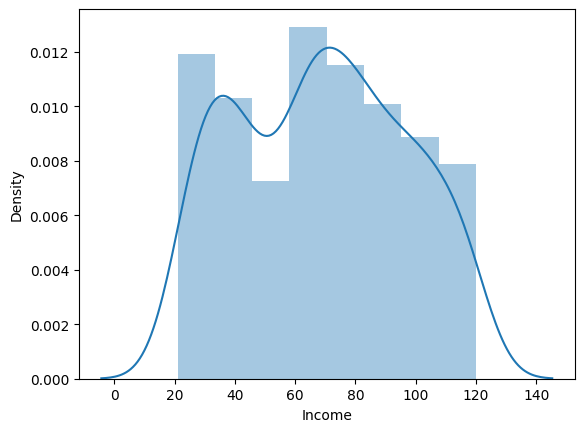

In [44]:
sns.distplot(company['Income'])

In [6]:
from ast import Lambda
# Marking high sales which is greater than 8 as 1 and others as 0
company['High Sales'] = company.Sales.map(lambda x : 1 if x>8 else 0)
'''company['Sales'] = np.where(company['Sales'] > 8, 1,)
company['Sales'] = np.where(company['Sales'] <= 8, 0,)'''
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  High Sales  
0         17   Yes  Yes           1  
1         10   Yes  Yes           1  
2         12   Yes  Yes           1  
3         14   Yes  Yes           0  
4         13   Yes   No           0

In [7]:
# Label encoding to convert categorical data to numerical data
company.ShelveLoc = LabelEncoder().fit_transform(company.ShelveLoc)
company.Urban = LabelEncoder().fit_transform(company.Urban)
company.US = LabelEncoder().fit_transform(company.US)
company.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  High Sales  
0         17      1   1           1  
1         10      1   1           1  
2         12      1   1           1  
3         14      1   1           0  
4         13      1   0           0

In [8]:
# Set feature and target variable
X = company.drop(['Sales', 'High Sales'], axis = 1)
y = company['High Sales']
X.shape, y.shape

((400, 10), (400,))

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# Using KFold method
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

In [11]:
# Building Random Forest Model
model = RandomForestClassifier(n_estimators = 100, max_features = 3)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.79


In [12]:
# Using train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [13]:
model = RandomForestClassifier(n_estimators = 100, max_features = 3)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [14]:
model.score(X_test, y_test)

0.7416666666666667

In [15]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [16]:
# Confusion matrics
cm = confusion_matrix(y_test, y_pred)
cm

array([[61, 11],
       [20, 28]])

In [17]:
accuracy_score(y_test, y_pred)

0.7416666666666667

# Fraud_Check

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [50]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [51]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [52]:
fraud['Taxable.Income.Category'] = np.where(fraud['Taxable.Income'] <= 30000, 'Risky', 'Good')
fraud.sample(5)

Undergrad Marital.Status  Taxable.Income  City.Population  \
117        NO         Single           54638            96370   
572       YES        Married           39818           148068   
89        YES        Married           26741           176050   
359       YES         Single           33215           157299   
304       YES       Divorced           62141           106757   

     Work.Experience Urban Taxable.Income.Category  
117               29   YES                    Good  
572               13    NO                    Good  
89                20    NO                   Risky  
359               11    NO                    Good  
304               23   YES                    Good

In [53]:
fraud.drop('Taxable.Income', axis = 1, inplace = True)
fraud.sample(5)

Undergrad Marital.Status  City.Population  Work.Experience Urban  \
81        YES       Divorced           121608               24    NO   
198        NO         Single            48025               28   YES   
416        NO         Single            33982               30    NO   
577       YES        Married            52940                5   YES   
154        NO         Single            82520               29   YES   

    Taxable.Income.Category  
81                     Good  
198                    Good  
416                    Good  
577                    Good  
154                   Risky

In [54]:
# Label Encoding
fraud['Undergrad'] = LabelEncoder().fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = LabelEncoder().fit_transform(fraud['Marital.Status'])
fraud['Urban'] = LabelEncoder().fit_transform(fraud['Urban'])
fraud['Taxable.Income.Category'] = LabelEncoder().fit_transform(fraud['Taxable.Income.Category'])
fraud

Undergrad  Marital.Status  City.Population  Work.Experience  Urban  \
0            0               2            50047               10      1   
1            1               0           134075               18      1   
2            0               1           160205               30      1   
3            1               2           193264               15      1   
4            0               1            27533               28      0   
..         ...             ...              ...              ...    ...   
595          1               0            39492                7      1   
596          1               0            55369                2      1   
597          0               0           154058                0      1   
598          1               1           180083               17      0   
599          0               0           158137               16      0   

     Taxable.Income.Category  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
595                        0  
596                        0  
597                        0  
598                        0  
599                        0  

[600 rows x 6 columns]

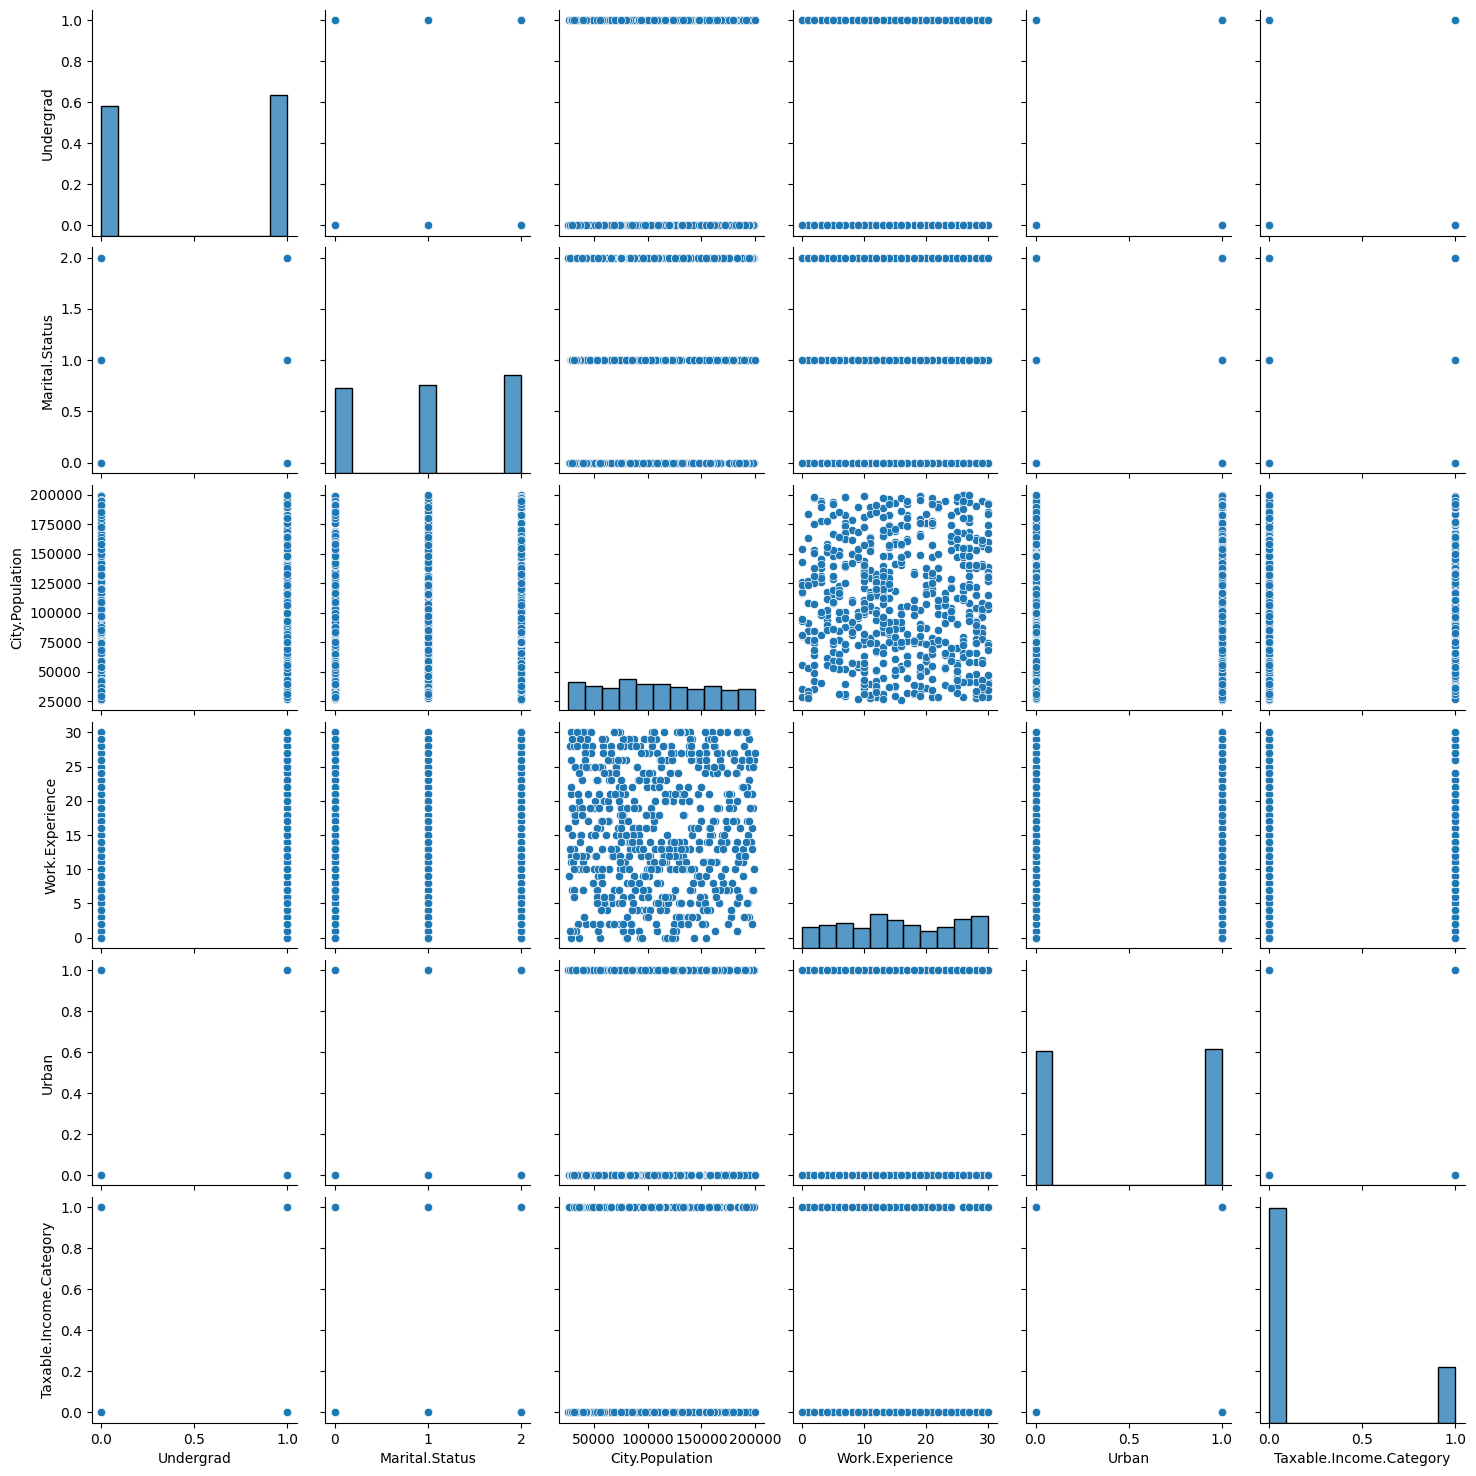

In [55]:
# Visualization
sns.pairplot(fraud)

<Axes: xlabel='Marital.Status', ylabel='Taxable.Income.Category'>

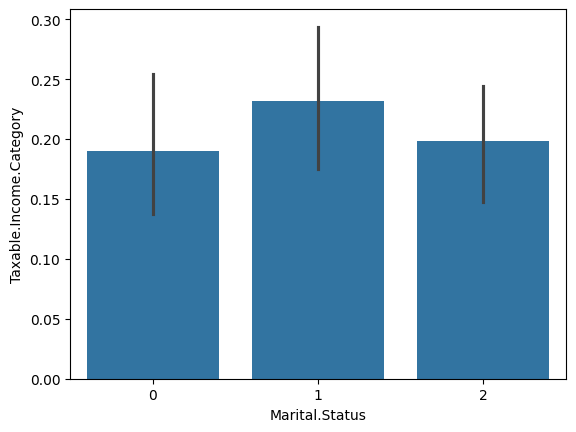

<Axes: xlabel='Marital.Status', ylabel='Taxable.Income.Category'>

In [56]:
sns.barplot(x = 'Marital.Status', y = 'Taxable.Income.Category', data = fraud)

<Axes: xlabel='Taxable.Income.Category', ylabel='Urban'>

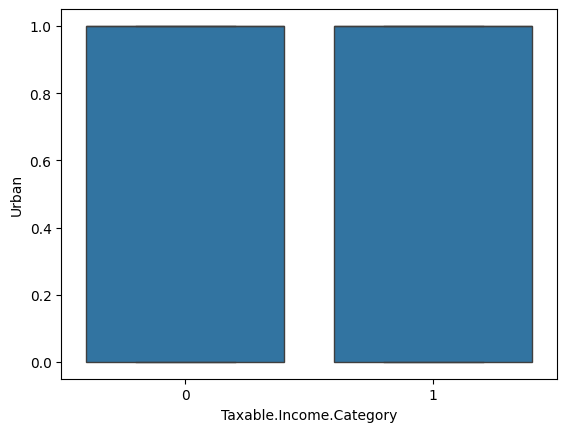

In [58]:
sns.boxplot(x = 'Taxable.Income.Category', y = 'Urban', data = fraud)

In [61]:
sns.catplot(x = 'Marital.Status', y = 'Taxable.Income.Category', data = fraud)

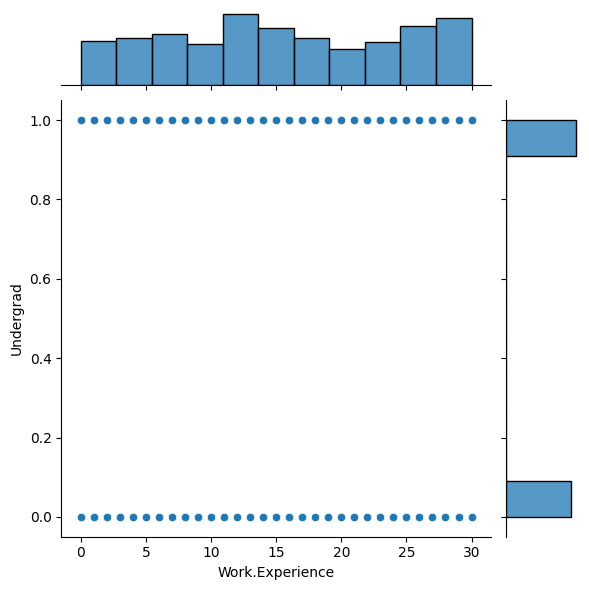

In [65]:
sns.jointplot(x = 'Work.Experience', y = 'Undergrad', data = fraud)

<Axes: xlabel='Marital.Status', ylabel='Taxable.Income.Category'>

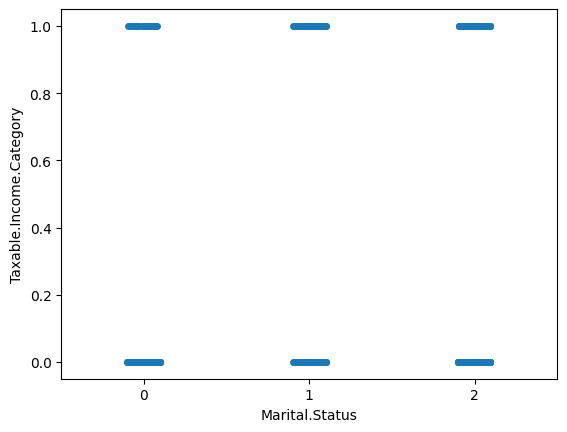

In [66]:
sns.stripplot(x = 'Marital.Status', y = 'Taxable.Income.Category', data = fraud)

In [67]:
sns.distplot(fraud['Taxable.Income.Category'])

<Axes: xlabel='Taxable.Income.Category', ylabel='Density'>

In [68]:
sns.distplot(fraud['Work.Experience'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

In [24]:
X = fraud.drop('Taxable.Income.Category', axis = 1)
y = fraud['Taxable.Income.Category']

In [25]:
X.shape

(600, 5)

In [26]:
# using kfold
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

In [27]:
# Building Random Forest Model
model = RandomForestClassifier(n_estimators = 100, max_features = 2)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.7416666666666666


In [28]:
# Using train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [29]:
model = RandomForestClassifier(n_estimators = 100, max_features = 3)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [30]:
model.score(X_test, y_test)

0.7888888888888889

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [32]:
# Confusion matrics
cm = confusion_matrix(y_test, y_pred)
cm

array([[142,   1],
       [ 37,   0]])

In [33]:
accuracy_score(y_test, y_pred)

0.7888888888888889